<a href="https://colab.research.google.com/github/PedroAlmeida18/CalculoNumerico/blob/main/Atividade_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

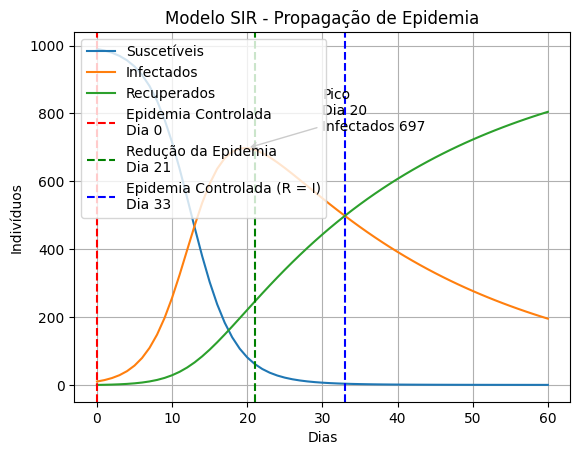

Dia do pico da epidemia: 20
Número de infectados no pico: 697
Dia em que a epidemia começa a ficar controlada: 0
Dia em que a epidemia começa a reduzir: 21
Dia em que a epidemia é considerada controlada (R = I): 33


In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros do modelo
beta = 0.4  # Coeficiente de transmissão
gamma = 0.035  # Taxa de recuperação/cura
N = 1000  # População total

# Condições iniciais
S0 = 990
I0 = 10
R0 = 0

# Taxa de variação das classes
def dSdt(S, I):
    return - (beta / N) * S * I

def dIdt(S, I):
    return (beta / N) * S * I - gamma * I

def dRdt(I):
    return gamma * I

# Método de Runge-Kutta de ordem 2 (Euler aperfeiçoado)
def runge_kutta2_step(S, I, R, h):
    S1 = dSdt(S, I)
    I1 = dIdt(S, I)
    R1 = dRdt(I)

    S2 = dSdt(S + h * S1, I + h * I1)
    I2 = dIdt(S + h * S1, I + h * I1)
    R2 = dRdt(I + h * I1)

    S_new = S + (h / 2) * (S1 + S2)
    I_new = I + (h / 2) * (I1 + I2)
    R_new = R + (h / 2) * (R1 + R2)

    return S_new, I_new, R_new

# Parâmetros de simulação
days = 60
dt = 1  # Passo de tempo
num_steps = int(days / dt)

# Inicialização de arrays para armazenar resultados
S_values = np.zeros(num_steps + 1)
I_values = np.zeros(num_steps + 1)
R_values = np.zeros(num_steps + 1)

S_values[0] = S0
I_values[0] = I0
R_values[0] = R0

# Simulação
for i in range(num_steps):
    S_values[i+1], I_values[i+1], R_values[i+1] = runge_kutta2_step(S_values[i], I_values[i], R_values[i], dt)

# Encontrando o pico da epidemia
peak_day = np.argmax(I_values)
peak_infections = I_values[peak_day]

# Encontrando o dia em que o número de recuperados é igual ao número de infectados (epidemia controlada)
control_day = np.argmax((R_values >= I_values) & (time >= 30) & (time <= 40))

# Encontrando o dia em que a epidemia começa a ficar controlada (primeiro dia em que o número de infectados é < 10)
start_control_day = np.argmax(I_values < 10)

# Encontrando o dia em que a epidemia começa a reduzir (primeiro dia em que dI/dt é negativo)
start_reducing_day = np.argmax(np.diff(I_values) < 0) + 1

# Plotagem das curvas com informações adicionais
time = np.arange(0, days+dt, dt)
plt.plot(time, S_values, label='Suscetíveis')
plt.plot(time, I_values, label='Infectados')
plt.plot(time, R_values, label='Recuperados')
plt.xlabel('Dias')
plt.ylabel('Indivíduos')
plt.title('Modelo SIR - Propagação de Epidemia')
plt.legend()
plt.grid()

# Marcando os eventos no gráfico
plt.annotate(f'Pico\nDia {peak_day}\nInfectados {int(peak_infections)}',
             xy=(peak_day, peak_infections),
             xytext=(peak_day + 10, peak_infections + 50),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.axvline(x=start_control_day, color='r', linestyle='--', label=f'Epidemia Controlada\nDia {start_control_day}')
plt.axvline(x=start_reducing_day, color='g', linestyle='--', label=f'Redução da Epidemia\nDia {start_reducing_day}')
plt.axvline(x=control_day, color='b', linestyle='--', label=f'Epidemia Controlada (R = I)\nDia {control_day}')
plt.legend()

plt.show()

# Imprimindo informações
print(f'Dia do pico da epidemia: {peak_day}')
print(f'Número de infectados no pico: {int(peak_infections)}')
print(f'Dia em que a epidemia começa a ficar controlada: {start_control_day}')
print(f'Dia em que a epidemia começa a reduzir: {start_reducing_day}')
print(f'Dia em que a epidemia é considerada controlada (R = I): {control_day}')
